In [2]:
import pandas
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
water_data_before = pandas.read_csv('./cleaned_before.csv')

In [4]:
water_data_before

,file_name,datetime,lock_movement,undercarriage_replacement,water_temperature_C,water_level_cmNAP,air_temperature_01C,energy_proxy
0,DVS1ZP_Converted/20200706_131712.txt,2020-07-06 13:17:12,closing,0,18.1,19.0,13.8,3044749.0
1,DVS1ZP_Converted/20200706_173238.txt,2020-07-06 17:32:38,opening,0,18.2,198.0,13.8,3795221.0
2,DVS1ZP_Converted/20200706_190034.txt,2020-07-06 19:00:34,opening,0,18.7,73.0,13.8,3681963.0
3,DVS1ZP_Converted/20200706_202747.txt,2020-07-06 20:27:47,opening,0,18.5,-41.0,13.8,3563955.0
4,DVS1ZP_Converted/20200706_211903.txt,2020-07-06 21:19:03,opening,0,18.0,-97.0,13.8,3651022.0
...,...,...,...,...,...,...,...,...
2661,DVS1ZP_Converted/20210809_063743.txt,2021-08-09 06:37:43,closing,0,19.5,52.0,15.6,3317596.0
2662,DVS1ZP_Converted/20210809_074602.txt,2021-08-09 07:46:02,opening,0,18.5,-32.0,15.6,3798238.0
2663,DVS1ZP_Converted/20210809_075330.txt,2021-08-09 07:53:30,closing,0,18.3,-32.0,15.6,3187327.0
2664,DVS1ZP_Converted/20210809_085932.txt,2021-08-09 08:59:32,opening,0,19.0,-99.0,15.6,3889010.0


In [5]:
# Separating features and target
X = water_data_before['water_temperature_C'].values.reshape(-1, 1)
y = water_data_before['energy_proxy']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# voorspellen met test set
y_pred = linear_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the scores
print(f"Mean absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean absolute Error: 210952.5407240041
R-squared: 0.11130975939517529


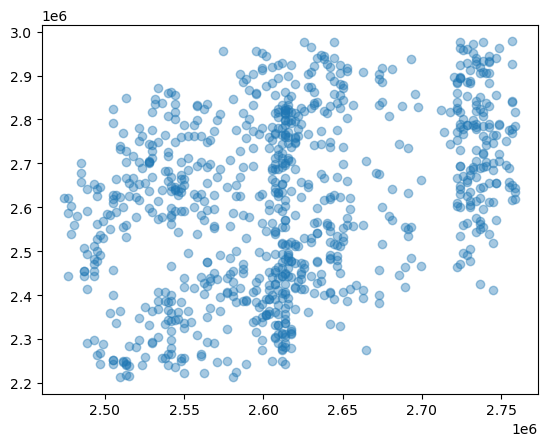

In [23]:
plot.scatter(y_pred, y_test, alpha=0.4)

In [15]:
water_data_after = pandas.read_csv('./cleaned_after.csv')

In [16]:
water_data_after

,file_name,datetime,lock_movement,undercarriage_replacement,water_temperature_C,water_level_cmNAP,air_temperature_01C,energy_proxy
0,DVS1ZP_Converted/20220513_084918.txt,2022-05-13 08:49:18,opening,1,15.6,-95.0,11.0,2401922.0
1,DVS1ZP_Converted/20220513_100149.txt,2022-05-13 10:01:49,opening,1,15.6,-39.0,11.0,2912658.0
2,DVS1ZP_Converted/20220513_112250.txt,2022-05-13 11:22:50,opening,1,15.6,59.0,11.0,2802840.0
3,DVS1ZP_Converted/20220513_130551.txt,2022-05-13 13:05:51,opening,1,15.7,168.0,10.7,2906343.0
4,DVS1ZP_Converted/20220513_132131.txt,2022-05-13 13:21:31,opening,1,15.7,171.0,10.7,2867409.0
...,...,...,...,...,...,...,...,...
3476,DVS1ZP_Converted/20230815_000205.txt,2023-08-15 00:02:05,opening,1,20.3,-14.0,12.4,2679450.0
3477,DVS1ZP_Converted/20230815_034130.txt,2023-08-15 03:41:30,opening,1,20.2,171.0,12.4,2680340.0
3478,DVS1ZP_Converted/20230815_045959.txt,2023-08-15 04:59:59,opening,1,20.1,92.0,12.4,2791437.0
3479,DVS1ZP_Converted/20230815_064418.txt,2023-08-15 06:44:18,opening,1,20.1,-14.0,12.4,2629123.0


In [17]:
# Separating features and target
X = water_data_after['water_temperature_C']
y = water_data_after['energy_proxy']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# voorspellen met test set
y_pred = linear_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the scores
print(f"Mean absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean absolute Error: 158430.2819701464
R-squared: 0.1379181565715265


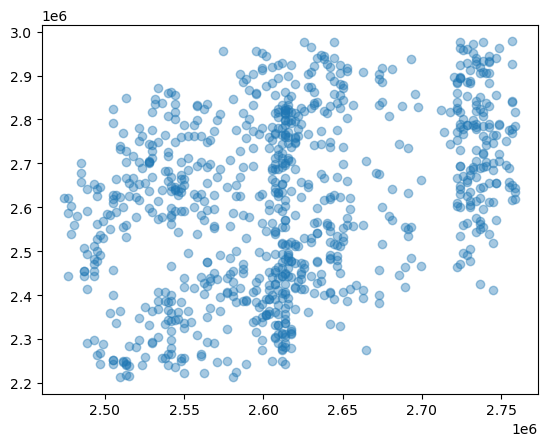

In [22]:
plot.scatter(y_pred, y_test, alpha=0.4)

In [3]:
all_water_data = pandas.read_csv('./waterinfo/cleaned_all.csv')

In [4]:
# Ensure we are only using numeric data
numeric_features = all_water_data.select_dtypes(include=[float, int]).columns
all_water_data = all_water_data[numeric_features]

# Assuming 'energy_usage' is the target column
X = all_water_data.drop(['energy_proxy'], axis=1)
y = all_water_data['energy_proxy']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X

,undercarriage_replacement,water_temperature_C,water_level_cmNAP,air_temperature_01C
0,0,18.1,19.0,13.8
1,0,18.2,198.0,13.8
2,0,18.7,73.0,13.8
3,0,18.5,-41.0,13.8
4,0,18.0,-97.0,13.8
...,...,...,...,...
6142,1,20.3,-14.0,12.4
6143,1,20.2,171.0,12.4
6144,1,20.1,92.0,12.4
6145,1,20.1,-14.0,12.4


In [5]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# voorspellen met test set
y_pred = linear_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the scores
print(f"Mean absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean absolute Error: 185089.7285566254
R-squared: 0.7552144960341546
